In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [7]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold, StratifiedGroupKFold, LeaveOneOut, ShuffleSplit, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR

In [5]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
iris = load_iris(as_frame=True)

In [10]:
logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [12]:
scores = cross_validate(logreg, iris['data'], iris['target'], cv=5, return_train_score=True)
scores

{'fit_time': array([0.02602386, 0.02802491, 0.02402234, 0.01901627, 0.02001739]),
 'score_time': array([0.00100088, 0.00100088, 0.00200176, 0.00100136, 0.00100112]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [13]:
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_score,train_score
0,0.026024,0.001001,0.966667,0.966667
1,0.028025,0.001001,1.000000,0.966667
2,0.024022,0.002002,0.933333,0.983333
3,0.019016,0.001001,0.966667,0.983333
4,0.020017,0.001001,1.000000,0.975000


In [19]:
shuffle_split = ShuffleSplit(train_size=0.5, test_size=0.3, n_splits=10)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=shuffle_split)
scores

array([0.97777778, 0.95555556, 0.95555556, 0.97777778, 0.97777778,
       0.97777778, 0.91111111, 0.97777778, 0.95555556, 0.95555556])

In [20]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

In [22]:
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
scores

array([0.75      , 0.6       , 0.66666667])

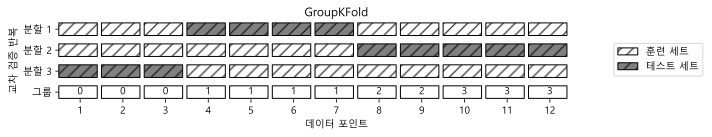

In [23]:
mglearn.plots.plot_group_kfold()